<a href="https://colab.research.google.com/github/MonikaLamba/Tensor-Flow-/blob/main/Another_copy_of_TensorFlow_FDP_Day_3_1_CNN_change_filter_to_64.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


import tensorflow as tf


In [16]:
import tensorflow as tf


Load the Fashion MNIST dataset


In [17]:
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


Normalize the pixel values


In [18]:
training_images = training_images / 255.0
test_images = test_images / 255.0


Define the model


In [19]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


Setup training parameters


In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train the model


In [21]:
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)



MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5001 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3755 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3390 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3172 - accuracy: 0.8833
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2991 - accuracy: 0.8895


Evaluate on the test set


In [22]:
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL EVALUATION:
313/313 [==============================] - 1s 2ms/step - loss: 0.3557 - accuracy: 0.8743


Define the model


In [23]:
model = tf.keras.models.Sequential([

# Add convolutions and max pooling,,,# 1 is color depth for Grey Image required 8 colors, 32 is filter, (3,3) is size of filter each, data set image is 28*28 and 1 is color depth
tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),


tf.keras.layers.MaxPooling2D(2, 2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

# Add the same layers as before
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])


Print the model summary



In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

Use same settings


In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train the model


In [26]:
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)



MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.4446 - accuracy: 0.8386
Epoch 2/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2937 - accuracy: 0.8919
Epoch 3/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.2486 - accuracy: 0.9091
Epoch 4/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.2166 - accuracy: 0.9194
Epoch 5/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1897 - accuracy: 0.9302


Evaluate on the test set



MODEL EVALUATION:
313/313 [==============================] - 5s 16ms/step - loss: 0.2622 - accuracy: 0.9054
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]
1/1 [==============================] - 0s 22ms/step


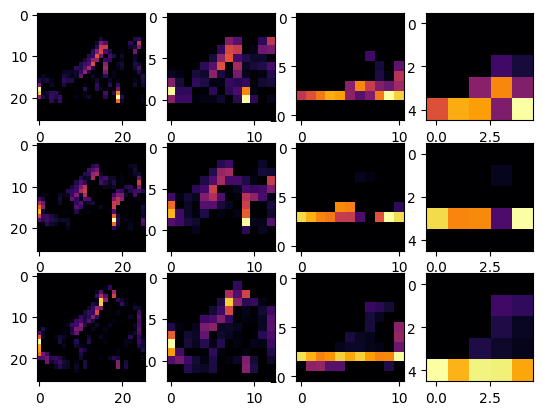

In [28]:
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)
#Visualizing the Convolutions and Pooling
print(test_labels[:100])
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

